In [1]:
!pip install geopandas matplotlib

  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached matplotlib-3.10.6-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pyogrio-0.11.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (5.3 kB)
  Using cached pandas-2.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached pyproj-3.7.2-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (31 kB)
  Using cached shapely-2.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached contourpy-1.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (109 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-manylinux2014_x8

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [3]:
# Get current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: /home/njm12/ATMS_596


In [4]:
# Replace with the path to your shapefile (.shp)
shapefile_path = "/home/njm12/ATMS_596/ne_10m_rivers_north_america.shp"

gdf = gpd.read_file(shapefile_path)
print(gdf.shape)

(4897, 41)


In [5]:
# Look at the first few rows
print(gdf.head())

# Get the column names and data types
print(gdf.info())

# Check the coordinate reference system (CRS)
print(gdf.crs)

# Basic statistics of numerical attributes
print(gdf.describe())

   strokeweig             name featurecla  scalerank  min_zoom  min_label  \
0        0.15  North Fork Salt      River         12       7.0        8.0   
1        0.20  North Fork Salt      River         12       7.0        8.0   
2        0.20             Salt      River         12       7.0        8.0   
3        0.15           Spring      River         12       7.0        8.0   
4        0.20           Spring      River         12       7.0        8.0   

        ne_id  rivernum    dissolve name_alt  ... name_sv name_tr name_vi  \
0  1746333385       NaN        None     None  ...    None    None    None   
1  1746333389       NaN        None     None  ...    None    None    None   
2  1159139641   22682.0  22682River     None  ...    None    None    None   
3  1746333393       NaN        None     None  ...    None    None    None   
4  1746333395       NaN        None     None  ...    None    None    None   

  name_zh    name_fa name_he name_uk name_ur name_zht  \
0    None       N

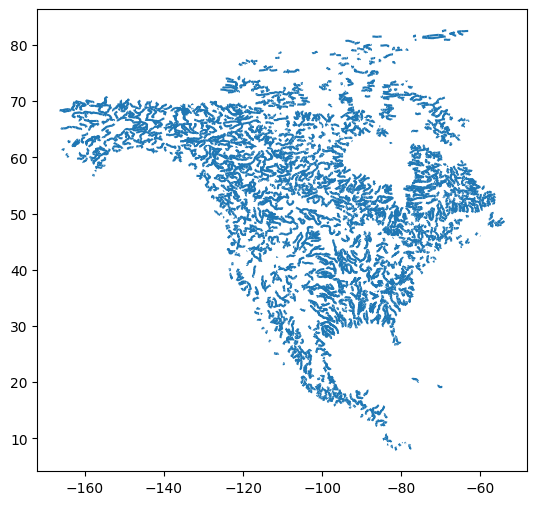

In [6]:
gdf.plot(figsize=(8,6))
plt.show()

In [7]:
#Types of geometry in shapefiles:

#Point → a single coordinate (e.g., a weather station location).

#MultiPoint → a collection of points.

#LineString (or PolyLine) → a series of connected points (e.g., rivers, roads).

#MultiLineString → multiple line features grouped together.

#Polygon → closed shapes (e.g., countries, lakes, land parcels).

#MultiPolygon → multiple polygons (e.g., Hawaii as several islands).

      strokeweig         name featurecla  scalerank  min_zoom  min_label  \
894         0.15  Mississippi      River         12       7.0        8.0   
2801        0.20  Mississippi      River         12       7.0        8.0   

           ne_id  rivernum    dissolve name_alt  ...      name_sv name_tr  \
894   1159125519   20020.0  20020River     None  ...  Mississippi    None   
2801  1159125551   20022.0  20022River     None  ...  Mississippi    None   

     name_vi name_zh name_fa   name_he name_uk name_ur name_zht  \
894     None   密西西比河    None  מיסיסיפי    None    None    密西西比河   
2801    None   密西西比河    None  מיסיסיפי    None    None    密西西比河   

                                               geometry  
894   LINESTRING (-77.27533 45.00144, -77.2754 44.99...  
2801  LINESTRING (-76.78562 44.93334, -76.76042 44.9...  

[2 rows x 41 columns]


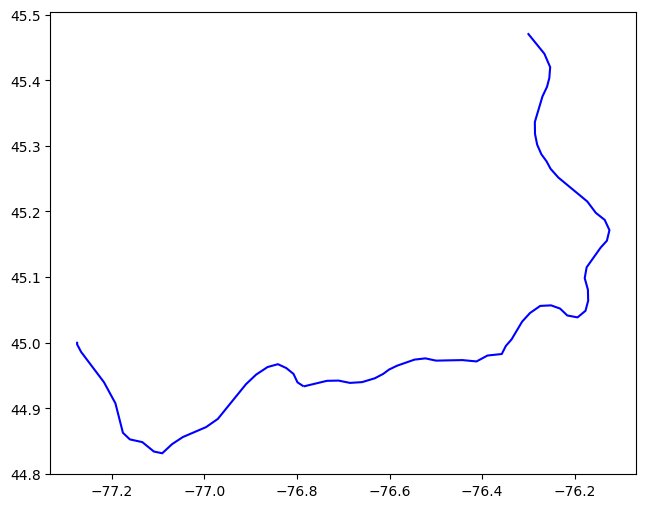

In [8]:
# Example: find all features with "Mississippi" in the name
mississippi = gdf[gdf["name"].str.contains("Mississippi", na=False)]
print(mississippi)

# Plot only those
mississippi.plot(figsize=(10,6), color="blue")
plt.show()

In [9]:
# Select all rows where "name" contains "Mississippi"
mississippi = gdf[gdf["name"].str.contains("Mississippi", na=False)]

print(mississippi[["name", "geometry"]])

             name                                           geometry
894   Mississippi  LINESTRING (-77.27533 45.00144, -77.2754 44.99...
2801  Mississippi  LINESTRING (-76.78562 44.93334, -76.76042 44.9...
